# State Estimation

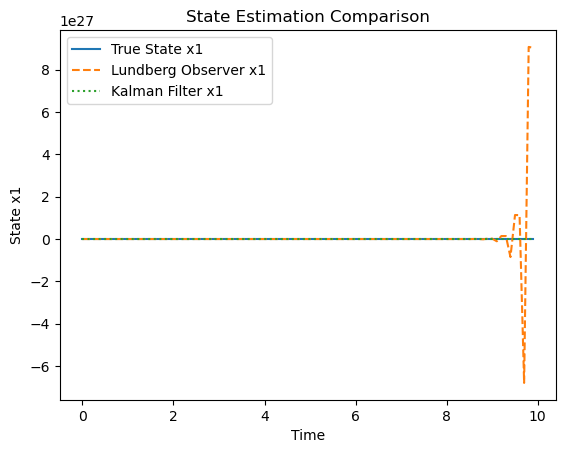

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define system matrices
A = np.array([[0, 1], [-2, -1]])
B = np.array([[0], [1]])
C = np.array([[1, 0]])
D = np.array([[0]])

# Define observer gain matrix L (for Lundberg observer)
L = np.array([[1], [1]])

# Define process noise covariance Q and measurement noise covariance R (for Kalman filter)
Q = np.eye(2) * 0.01
R = np.array([[1]])

# Define initial conditions
x0 = np.array([[0], [0]])
x_hat0 = np.array([[0], [0]])

# Time settings
dt = 0.1
time = np.arange(0, 10, dt)
n = len(time)

# Initialize arrays
x = np.zeros((2, n))
x_hat_lundberg = np.zeros((2, n))
x_hat_kalman = np.zeros((2, n))
P = np.eye(2)
I = np.eye(2)

# System simulation and state estimation
for k in range(1, n):
    # Control input (can be varied)
    u = np.sin(time[k])

    # System dynamics
    x[:, k] = A @ x[:, k-1] + B.flatten() * u
    y = C @ x[:, k] + D.flatten() * u

    # Lundberg Observer
    x_hat_lundberg[:, k] = A @ x_hat_lundberg[:, k-1] + B.flatten() * u + L.flatten() * (y - C @ x_hat_lundberg[:, k-1])

    # Kalman Filter Prediction
    x_hat_kalman[:, k] = A @ x_hat_kalman[:, k-1] + B.flatten() * u
    P = A @ P @ A.T + Q

    # Kalman Filter Update
    K = P @ C.T @ np.linalg.inv(C @ P @ C.T + R)
    x_hat_kalman[:, k] = x_hat_kalman[:, k] + K.flatten() * (y - C @ x_hat_kalman[:, k])
    P = (I - K @ C) @ P

# Plot results
plt.figure()
plt.plot(time, x[0, :], label='True State x1')
plt.plot(time, x_hat_lundberg[0, :], '--', label='Lundberg Observer x1')
plt.plot(time, x_hat_kalman[0, :], ':', label='Kalman Filter x1')
plt.legend()
plt.xlabel('Time')
plt.ylabel('State x1')
plt.title('State Estimation Comparison')
plt.show()
